In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import pickle

In [2]:
df=pd.read_csv("final_scout_dummy.csv")
df.head()

,make_model,body_type,price,km,prev_owner,hp,type,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,gears,age,number_of_comfort_convenience,number_of_entertainment_media,number_of_extras,number_of_safety_security,comfort_&_convenience_PAS_self-steering,comfort_&_convenience_PAS_camera,comfort_&_convenience_HEATEDSteering,entertainment_media_COMP,entertainment_media_SOUND,entertainment_media_TV,extras_SS,extras_TUNING,extras_SPORTPack,safety_&_security_DROWSINESS,safety_&_security_LANE
0,2,1,15770,56013,2.0,66.0,1.0,5.0,5.0,2,1422.0,3.0,1220.0,1.0,1,3.8,99,6.0,4.0,16.0,4.0,3.0,14.0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,14500,80000,1.0,141.0,1.0,3.0,4.0,2,1798.0,4.0,1255.0,1.0,1,5.6,129,7.0,3.0,9.0,5.0,4.0,15.0,0,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1,14640,83450,1.0,85.0,1.0,4.0,4.0,2,1598.0,4.0,1165.0,1.0,1,3.8,99,6.0,4.0,13.0,2.0,2.0,12.0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,14500,73000,1.0,66.0,1.0,3.0,4.0,2,1422.0,3.0,1195.0,1.0,1,3.8,99,6.0,4.0,16.0,8.0,3.0,14.0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,1,16790,16200,1.0,66.0,1.0,5.0,5.0,2,1422.0,3.0,1165.0,1.0,1,4.1,109,6.0,4.0,13.0,7.0,4.0,13.0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [3]:
df.co_2_emission.dtype

dtype('O')

In [4]:
df.drop(columns=["co_2_emission"], inplace=True)

In [5]:
df.shape

(14669, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14669 entries, 0 to 14668
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   make_model                               14669 non-null  int64  
 1   body_type                                14669 non-null  int64  
 2   price                                    14669 non-null  int64  
 3   km                                       14669 non-null  int64  
 4   prev_owner                               14669 non-null  float64
 5   hp                                       14669 non-null  float64
 6   type                                     14669 non-null  float64
 7   nr_of_doors                              14669 non-null  float64
 8   nr_of_seats                              14669 non-null  float64
 9   gearing_type                             14669 non-null  int64  
 10  displacement                             14669

In [7]:
df.isnull().any().any()

False

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model,14669.0,3.435135,1.854937,1.0,2.0,3.0,5.0,9.0
body_type,14669.0,1.891335,1.126714,1.0,1.0,1.0,3.0,9.0
price,14669.0,18008.598746,7307.175535,13.0,12900.0,16900.0,21900.0,74600.0
km,14669.0,31953.990456,36755.767837,0.0,2330.0,20855.0,46928.0,317000.0
prev_owner,14669.0,1.052969,0.230874,1.0,1.0,1.0,1.0,4.0
hp,14669.0,88.552662,26.847572,1.0,66.0,85.0,101.0,294.0
type,14669.0,1.675097,1.182360,1.0,1.0,1.0,2.0,5.0
nr_of_doors,14669.0,4.650351,0.650232,2.0,4.0,5.0,5.0,5.0
nr_of_seats,14669.0,4.945463,0.484162,2.0,5.0,5.0,5.0,7.0
gearing_type,14669.0,1.519122,0.556213,1.0,1.0,1.0,2.0,3.0


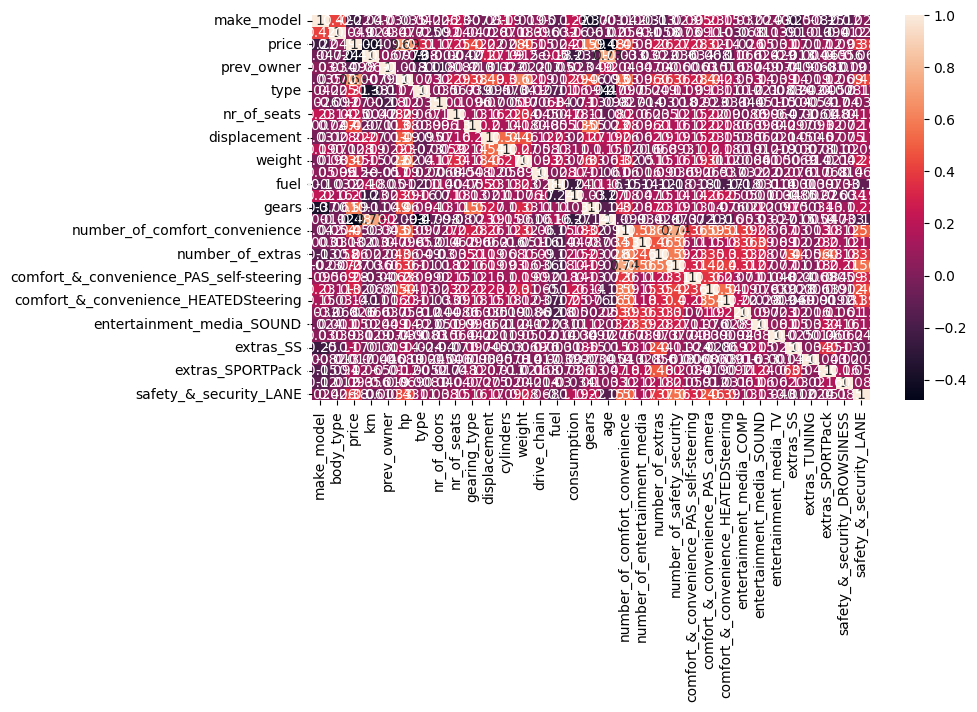

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Train & Test Split

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
X=df.drop("price", axis=1)
y=df.price

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=101)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11735, 32)
Train target shape   :  (11735,)
Test features shape  :  (2934, 32)
Test target shape    :  (2934,)


# Modeling for XGBoost

In [13]:
#pip install --upgrade pip

In [14]:
#pip install xgboost==0.90

In [15]:
import xgboost as xgb
xgb.__version__

'0.90'

In [16]:
cat = X.select_dtypes("object").columns
cat

Index([], dtype='object')

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [18]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

#base_estimator=DecisionTreeRegressor(max_depth=3)
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101, objective="reg:squarederror"))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index([], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(objective='reg:squarederror', random_state=101))])

In [19]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror") #objective="reg:squarederror"
xgb_model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=101)

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [22]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,9.363344e-01,9.297475e-01
mae,1.226441e+03,1.230111e+03
mse,3.452100e+06,3.513303e+06
rmse,1.857983e+03,1.874381e+03


In [23]:
from sklearn.model_selection import cross_validate, cross_val_score

In [24]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101, 
                                                                           objective="reg:squarederror"))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             9.266844e-01
test_neg_mean_absolute_error       -1.274887e+03
test_neg_mean_squared_error        -3.977037e+06
test_neg_root_mean_squared_error   -1.990373e+03
dtype: float64

## Gridsearch for XGBoost

In [25]:
param_grid = {"XGB_model__n_estimators":[100, 300],
              "XGB_model__max_depth":[1, 2], 
              "XGB_model__learning_rate": [0.01, 0.05, 0.1],
              "XGB_model__subsample":[0.5, 1], 
              "XGB_model__colsample_bytree":[0.5, 1]}

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101, 
                                                                           objective="reg:squarederror"))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1)

In [28]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index([], dtype='object'))])),
                                       ('XGB_model',
                                        XGBRegressor(objective='reg:squarederror',
                                                     random_state=101))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 1],
                         'XGB_model__learning_rate': [0.01, 0.05, 0.1],
                         'XGB_model__max_

In [29]:
grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 300,
 'XGB_model__subsample': 1}

In [30]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index([], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(max_depth=2, n_estimators=300,
                              objective='reg:squarederror',
                              random_state=101))])

In [31]:
grid_model.best_score_

-1969.6861029721872

In [32]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,9.376248e-01,9.330703e-01
mae,1.210815e+03,1.213062e+03
mse,3.382134e+06,3.347134e+06
rmse,1.839058e+03,1.829517e+03


## Feature importance

In [33]:
features = list(X.select_dtypes("object").columns) + list(X.select_dtypes("number").columns) 
features

['make_model',
 'body_type',
 'km',
 'prev_owner',
 'hp',
 'type',
 'nr_of_doors',
 'nr_of_seats',
 'gearing_type',
 'displacement',
 'cylinders',
 'weight',
 'drive_chain',
 'fuel',
 'consumption',
 'gears',
 'age',
 'number_of_comfort_convenience',
 'number_of_entertainment_media',
 'number_of_extras',
 'number_of_safety_security',
 'comfort_&_convenience_PAS_self-steering',
 'comfort_&_convenience_PAS_camera',
 'comfort_&_convenience_HEATEDSteering',
 'entertainment_media_COMP',
 'entertainment_media_SOUND',
 'entertainment_media_TV',
 'extras_SS',
 'extras_TUNING',
 'extras_SPORTPack',
 'safety_&_security_DROWSINESS',
 'safety_&_security_LANE']

In [34]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(learning_rate=0.05, max_depth=2,
                              n_estimators=300, objective='reg:squarederror', random_state=101,subsample=0.5))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index([], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(learning_rate=0.05, max_depth=2, n_estimators=300,
                              objective='reg:squarederror', random_state=101,
                              subsample=0.5))])

In [35]:
pipe_model["XGB_model"].feature_importances_

array([0.07744829, 0.00166634, 0.05255564, 0.        , 0.217167  ,
       0.0195854 , 0.00425504, 0.00750265, 0.0510564 , 0.01633921,
       0.00286611, 0.03382535, 0.00176136, 0.00144998, 0.00796743,
       0.22017851, 0.16441508, 0.01184974, 0.00487318, 0.00534459,
       0.003426  , 0.00711183, 0.00658893, 0.02916276, 0.        ,
       0.        , 0.        , 0.00759983, 0.        , 0.0021215 ,
       0.        , 0.04188188], dtype=float32)

In [36]:
imp_feats = pd.DataFrame(data=pipe_model["XGB_model"].feature_importances_, columns=['xgb_Importance'], index=features)
xgb_imp_feats = imp_feats.sort_values('xgb_Importance', ascending=False)
xgb_imp_feats

,xgb_Importance
gears,0.220179
hp,0.217167
age,0.164415
make_model,0.077448
km,0.052556
gearing_type,0.051056
safety_&_security_LANE,0.041882
weight,0.033825
comfort_&_convenience_HEATEDSteering,0.029163
type,0.019585


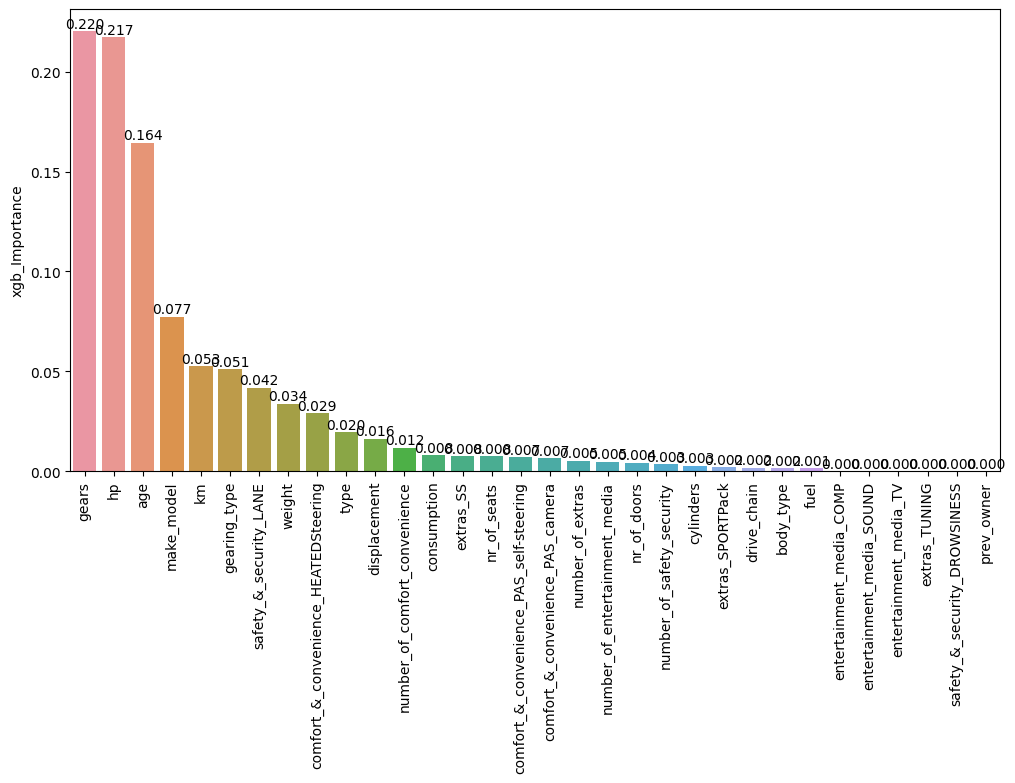

In [37]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

# Final Model

In [38]:
X_new = df[["gears",  "hp", "age", "make_model", "km"]]
X_new.head()

,gears,hp,age,make_model,km
0,6.0,66.0,4.0,2,56013
1,7.0,141.0,3.0,2,80000
2,6.0,85.0,4.0,2,83450
3,6.0,66.0,4.0,2,73000
4,6.0,66.0,4.0,2,16200


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=101)

In [40]:
operations = [("XGB_model",XGBRegressor(learning_rate=0.01, max_depth=2,
                              n_estimators=300, objective='reg:squarederror', random_state=101,subsample=1))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train,y_train)
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.125727e-01,8.140897e-01
mae,2.133284e+03,2.077769e+03
mse,1.016276e+07,9.297313e+06
rmse,3.187909e+03,3.049150e+03


In [41]:
operations = [("XGB_model",XGBRegressor(learning_rate=0.01, max_depth=2,
                              n_estimators=300, objective='reg:squarederror', random_state=101,subsample=1))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             8.104245e-01
test_neg_mean_absolute_error       -2.143819e+03
test_neg_mean_squared_error        -1.029188e+07
test_neg_root_mean_squared_error   -3.204008e+03
dtype: float64

In [42]:
X_new.head()

,gears,hp,age,make_model,km
0,6.0,66.0,4.0,2,56013
1,7.0,141.0,3.0,2,80000
2,6.0,85.0,4.0,2,83450
3,6.0,66.0,4.0,2,73000
4,6.0,66.0,4.0,2,16200


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer



operations = [("XGB_model",XGBRegressor(learning_rate=0.05, max_depth=2,
                              n_estimators=300, objective='reg:squarederror', random_state=101,subsample=0.5))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_new, y)

Pipeline(steps=[('XGB_model',
                 XGBRegressor(learning_rate=0.05, max_depth=2, n_estimators=300,
                              objective='reg:squarederror', random_state=101,
                              subsample=0.5))])

In [44]:
pd.DataFrame(column_trans.fit_transform(X_new)).head()

,0,1,2,3,4
0,6.0,66.0,4.0,2.0,56013.0
1,7.0,141.0,3.0,2.0,80000.0
2,6.0,85.0,4.0,2.0,83450.0
3,6.0,66.0,4.0,2.0,73000.0
4,6.0,66.0,4.0,2.0,16200.0


## Prediction

In [45]:
samples = {"gears": [5, 6],
           "hp":[140, 60],
           'age':[1, 2],
           'make_model': [1, 2],
           "km":[80000,18000]}

In [46]:
df_samples = pd.DataFrame(samples)
df_samples

,gears,hp,age,make_model,km
0,5,140,1,1,80000
1,6,60,2,2,18000


In [47]:
pipe_model.predict(df_samples)

array([27254.871, 16688.203], dtype=float32)

In [48]:
pickle.dump(pipe_model, open('carpriceXGB_model.pkl', 'wb'))

### Preperation for the Deployment

In [50]:
df.hp.max()

294.0

In [51]:
df.km.max()

317000

In [52]:
df.make_model.value_counts()

1    2944
2    2448
3    2442
4    2305
5    2062
6    1609
7     833
8      25
9       1
Name: make_model, dtype: int64